In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

### 20160425
### 4 month data between nov 2015 and feb 2016
### all formats
### >=50% and 300ms
### inscreen left outer join delivery
### adspaceid, originaladid, surveyadid, formt, market, platform, devicemodel, platformtype, os, adspaceid,premlevel, click, interaction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# this allows plots to appear directly in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
# pip install patsy
# pip install statsmodels
import statsmodels.formula.api as smf
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

from IPython.core.display import display, HTML

In [3]:
# define url
url_0511 = '/Users/shaokuixing/Desktop/whatever/survey50_300_left20160426.csv'

# read csv file without header
rawData = pd.read_csv(url_0511, sep='\t', thousands = '.', decimal =',', header=None)

# add column label
rawData.columns = ['surveyid', 'originaladid','surveyadid','format','market','originaladstarttime',
                   'originaladendtime','surveyresponcetime','uid','answersetid','answerid','questionid',
                   'questiontext','optionid','optiontext','iscomplete','isrefgroup','platformid',
                   'devicemodelid','platformtypeid','osid','adspaceid','premlevel','latestimptime','earliestimptime',
                   'deliveredimp','imp30pct300ms','click','1stinteraction','imp0pct0ms', 'viewtime50pct300ms'                  
                  ]
# see first 2 rows
rawData.head(2)

,surveyid,originaladid,surveyadid,format,market,originaladstarttime,originaladendtime,surveyresponcetime,uid,answersetid,answerid,questionid,questiontext,optionid,optiontext,iscomplete,isrefgroup,platformid,devicemodelid,platformtypeid,osid,adspaceid,premlevel,latestimptime,earliestimptime,deliveredimp,imp30pct300ms,click,1stinteraction,imp0pct0ms,viewtime50pct300ms
0,291,36430,36355,swipe,FI,2015-11-01 23:00:00,2015-11-22 22:59:00,2015-11-04 20:31:57,5857845920412998079,218047,595092,86,Is the ad interesting for you?<br><span class=...,263,2,t,f,200,104110,1,25000,8867,100,2015-11-03 13:38:05.139,2015-11-03 13:38:03.618,1,1,0,0,1,2920
1,291,36430,36355,swipe,FI,2015-11-01 23:00:00,2015-11-22 22:59:00,2015-11-05 09:50:28,388034536731279936,218979,597580,83,Next time you are about to use/purchase §categ...,254,2,t,f,200,102922,1,25000,10181,50,2015-11-05 09:47:16.51,2015-11-03 12:44:51.541,2,1,0,0,1,1056


In [4]:
# check NaN and null values by column
rawData.isnull().any()

surveyid               False
originaladid           False
surveyadid             False
format                 False
market                 False
originaladstarttime    False
originaladendtime      False
surveyresponcetime     False
uid                    False
answersetid            False
answerid               False
questionid             False
questiontext           False
optionid               False
optiontext             False
iscomplete             False
isrefgroup             False
platformid             False
devicemodelid           True
platformtypeid         False
osid                   False
adspaceid              False
premlevel              False
latestimptime          False
earliestimptime        False
deliveredimp           False
imp30pct300ms          False
click                  False
1stinteraction         False
imp0pct0ms             False
viewtime50pct300ms      True
dtype: bool

In [5]:
# check how many null values exist in devicemodelid
print ('no. rows with null deviceModelId :',rawData.devicemodelid.isnull().values.sum())
print ('no. rows with null viewtime50pct300ms :',rawData.devicemodelid.isnull().values.sum())
print ('no. rows and columns in total dataset :',rawData.shape)

('no. rows with null deviceModelId :', 1025)
('no. rows with null viewtime50pct300ms :', 1025)
('no. rows and columns in total dataset :', (512114, 31))


In [6]:
# show 5 random rows of data with devicemodel being null
rawData[rawData.devicemodelid.isnull()].sample(n=5, random_state=0)

,surveyid,originaladid,surveyadid,format,market,originaladstarttime,originaladendtime,surveyresponcetime,uid,answersetid,answerid,questionid,questiontext,optionid,optiontext,iscomplete,isrefgroup,platformid,devicemodelid,platformtypeid,osid,adspaceid,premlevel,latestimptime,earliestimptime,deliveredimp,imp30pct300ms,click,1stinteraction,imp0pct0ms,viewtime50pct300ms
428276,487,38864,39452,takeover,FI,2016-01-13 23:00:00,2016-02-07 21:59:00,2016-01-23 14:42:03,1278836919762939797,371619,1000428,90,How old are you?,284,25-34,t,f,200,NaN,1,25000,13035,80,2016-01-08 16:09:07.954,2016-01-08 16:09:07.626,1,1,0,0,1,9900
16715,320,37017,37112,takeover,FR,2015-11-09 23:00:00,2015-12-27 22:59:00,2015-12-05 07:51:37,6115363262446592620,273555,741567,91,I am,290,Female,t,f,200,NaN,1,25100,12383,100,2015-11-20 11:35:31.737,2015-11-20 11:35:31.737,1,0,0,0,0,NaN
32644,352,36100,37351,takeover,FI,2015-11-12 23:00:00,2015-12-20 21:59:00,2015-12-17 20:44:38,2494753593507054748,304735,830826,86,Is the ad interesting for you?<br><span class=...,264,3,t,f,200,NaN,1,24400,9751,80,2015-12-14 08:43:19.632,2015-12-11 07:52:36.346,3,1,0,0,2,54515
360632,438,38798,39010,takeover,NL,2015-12-22 07:00:00,2016-01-31 22:59:00,2015-12-30 06:07:00,414074184151369928,336740,916984,86,Is the ad interesting for you?<br><span class=...,266,5,t,t,200,NaN,1,24200,10688,50,2015-12-28 13:20:49.689,2015-12-26 20:50:41.813,3,2,0,0,3,230107
464646,494,39640,39719,takeover,FI,2016-01-26 15:15:00,2016-02-19 21:59:00,2016-02-03 12:58:56,4428159927927460041,390321,1042740,91,I am,290,Female,t,f,200,NaN,1,25100,11019,80,2015-12-14 19:14:39.974,2015-12-14 19:14:38.784,1,1,0,0,1,46888


In [7]:
# show 5 random rows of data with viewtime being null
rawData[rawData.viewtime50pct300ms.isnull()].sample(n=5, random_state=0)

,surveyid,originaladid,surveyadid,format,market,originaladstarttime,originaladendtime,surveyresponcetime,uid,answersetid,answerid,questionid,questiontext,optionid,optiontext,iscomplete,isrefgroup,platformid,devicemodelid,platformtypeid,osid,adspaceid,premlevel,latestimptime,earliestimptime,deliveredimp,imp30pct300ms,click,1stinteraction,imp0pct0ms,viewtime50pct300ms
128083,412,37938,38529,takeover,SE,2015-12-22 23:00:00,2015-12-27 22:59:00,2015-12-22 12:38:27,5231395000856403394,320933,876429,83,Next time you are about to use/purchase §categ...,255,3,t,f,200,102974,1,24400,5791,70,2015-12-18 08:25:39.093,2015-12-18 08:25:39.093,1,0,0,0,0,NaN
116386,412,35912,38530,takeover,SE,2015-11-30 23:00:00,2015-12-21 22:59:00,2015-12-15 21:14:37,1541464092701817227,299066,814461,84,Have you seen this ad on a mobile device before?,258,No,t,t,100,100000,1,17100,7511,70,2015-12-15 21:09:39.272,2015-12-15 21:09:39.272,1,0,0,0,0,NaN
37871,370,35335,37913,takeover,UK,2015-11-25 23:00:00,2015-12-20 22:59:00,2015-12-01 12:22:17,8938715974323840301,267021,725310,90,How old are you?,284,25-34,t,f,100,103010,1,18400,13544,70,2015-11-25 16:14:09.157,2015-11-25 16:14:09.157,1,0,0,0,0,NaN
277877,415,38369,38572,takeover,SE,2015-12-08 23:00:00,2015-12-24 22:59:00,2015-12-18 21:59:49,6604673828460915347,309286,843756,83,Next time you are about to use/purchase §categ...,253,1,t,t,200,103546,1,24400,7529,30,2015-11-10 19:25:39.297,2015-11-10 19:25:39.297,1,0,0,0,0,NaN
136771,412,37939,38530,takeover,SE,2015-12-27 23:00:00,2015-12-28 22:59:00,2015-12-20 14:17:15,4565499719095470341,314355,858776,83,Next time you are about to use/purchase §categ...,256,4,t,t,200,106142,1,25000,10424,90,2015-11-27 08:31:42.979,2015-11-27 08:31:42.979,1,0,0,0,0,NaN


In [8]:
# fill all null values with 0
rawData['viewtime50pct300ms']=rawData.viewtime50pct300ms.fillna(0)
rawData['devicemodelid']=rawData.devicemodelid.fillna(0)
# copy data
df1=rawData.copy()
# check if any data point is null at all
df1.isnull().any().any()

False

In [9]:
# define url
url_adspace = '/Users/shaokuixing/Desktop/whatever/adspace_apptype_channel.csv'

# read csv file without header
adspace = pd.read_csv(url_adspace, sep=',', thousands = '.', decimal =',')

# show adspace 5 rows
adspace.sample(5)

adspace.shape


(12172, 4)

In [10]:
import sqlite3
from pandas.io import sql
cnx = sqlite3.connect(':memory:', timeout=3000)
cnx.text_factory = str

In [11]:
# write to database
sql.to_sql(df1, name = 'df1', con=cnx, if_exists='replace')
sql.to_sql(adspace, name = 'adspace', con=cnx, if_exists='replace')

In [12]:
# join 2 data sets
df2 = sql.read_sql("select * from df1 d left outer join adspace s on d.adspaceid=s.adspaceid;",cnx)
df2.sample(5)

,index,surveyid,originaladid,surveyadid,format,market,originaladstarttime,originaladendtime,surveyresponcetime,uid,answersetid,answerid,questionid,questiontext,optionid,optiontext,iscomplete,isrefgroup,platformid,devicemodelid,platformtypeid,osid,adspaceid,premlevel,latestimptime,earliestimptime,deliveredimp,imp30pct300ms,click,1stinteraction,imp0pct0ms,viewtime50pct300ms,index,adspaceid,apptype,apptypegroup,channel
54105,54105,385,37864,38120,takeover,NL,2015-11-28 23:00:00,2015-12-20 22:59:00,2015-12-15 22:40:09,915546198072551695,299222,814959,83,Next time you are about to use/purchase §categ...,253,1,t,f,100,104772,1,19100,7848,60,2015-12-03 22:35:19.245,2015-11-11 07:41:26.682,17,11,0,2,10,367022,4812,7848,IPHONE_APP,MOBILE_APP,Entertainment
149736,149736,412,37941,38530,takeover,SE,2015-12-29 23:00:00,2015-12-31 22:59:00,2015-12-14 18:43:27,414086232668129786,295653,803672,86,Is the ad interesting for you?<br><span class=...,264,3,t,t,200,102922,1,25000,8580,70,2015-12-03 20:02:46.851,2015-12-03 20:02:46.851,1,0,0,0,0,0,5345,8580,MOBILE_WEB,MOBILE_WEB,Entertainment
5204,5204,305,35213,36750,takeover,SE,2015-11-01 23:00:00,2015-11-15 22:59:00,2015-11-07 19:29:46,861466929711395624,223793,610846,90,How old are you?,283,15-24,t,f,200,104110,1,25000,14335,80,2015-11-07 19:25:10.907,2015-11-07 19:25:10.907,1,0,0,0,0,0,11003,14335,MOBILE_WEB,MOBILE_WEB,Fashion Lifestyle
373989,373989,446,38941,39134,tablet_halfscreen,NL,2015-12-31 23:00:00,2016-01-24 13:59:00,2016-01-05 15:04:15,2735329847197963179,342625,930044,83,Next time you are about to use/purchase §categ...,254,2,t,f,100,102719,1,19000,7848,60,2016-01-05 10:02:38.484,2015-11-12 11:10:15.566,47,41,4,4,40,371372,4812,7848,IPHONE_APP,MOBILE_APP,Entertainment
72041,72041,392,38169,38239,takeover,SE,2015-12-03 23:00:00,2015-12-31 22:59:00,2015-12-20 07:27:09,189417817803056310,313267,855559,83,Next time you are about to use/purchase §categ...,254,2,t,f,100,103010,1,19100,10128,70,2015-12-19 22:17:17.62,2015-11-02 21:09:29.212,220,220,1,1,207,1779304,6835,10128,IPHONE_APP,MOBILE_APP,Gaming/Social Apps


In [13]:
# check if the joined datasets contain null value
df2.isnull().any().any()

False

In [14]:
# check number of column and rows of data
df2.shape

(512114, 37)

In [15]:
# look at all columns vertically
# df2.head(1).transpose()

In [16]:
# count rows by format
df2.format.value_counts()

takeover             450351
swipe                 58514
tablet_halfscreen      2589
interstitial            660
Name: format, dtype: int64

In [124]:
# select subset based on column values condition OR
# select only takeover and swipe formats
df3=df2.copy()
df3 = df3[(df3.format != 'takeover')|(df3.format != 'swipe')]
df3.sample(1)

,index,surveyid,originaladid,surveyadid,format,market,originaladstarttime,originaladendtime,surveyresponcetime,uid,answersetid,answerid,questionid,questiontext,optionid,optiontext,iscomplete,isrefgroup,platformid,devicemodelid,platformtypeid,osid,adspaceid,premlevel,latestimptime,earliestimptime,deliveredimp,imp30pct300ms,click,1stinteraction,imp0pct0ms,viewtime50pct300ms,index,adspaceid,apptype,apptypegroup,channel
184462,184462,412,38385,38529,takeover,SE,2015-12-28 23:00:00,2015-12-29 22:59:00,2015-12-20 11:05:06,2216843434683040488,313876,857467,84,Have you seen this ad on a mobile device before?,258,No,t,f,200,102922,1,25000,14739,60,2015-12-20 11:01:15.554,2015-12-20 11:01:09.713,1,1,0,0,1,2668,11381,14739,MOBILE_WEB,MOBILE_WEB,News


In [19]:
# load to db
#sql.to_sql(df2, name = 'df2', con=cnx, if_exists='replace')
# select 
#df3 = sql.read_sql("SELECT originaladid, cast((strftime('%s',t.finish)-strftime('%s',t.start)) AS real)/60/60 AS timeDiff, ",cnx)

In [27]:
df3.describe()

,index,surveyid,originaladid,surveyadid,uid,answersetid,answerid,questionid,optionid,platformid,devicemodelid,platformtypeid,osid,adspaceid,premlevel,deliveredimp,imp30pct300ms,click,1stinteraction,imp0pct0ms,viewtime50pct300ms,index,adspaceid
count,512114.000000,512114.000000,512114.000000,512114.000000,5.121140e+05,512114.000000,512114.000000,512114.000000,512114.000000,512114.000000,512114.000000,512114,512114.000000,512114.000000,512114.000000,512114.000000,512114.000000,512114.000000,512114.000000,512114.000000,5.121140e+05,512114.000000,512114.000000
mean,256056.500000,425.909922,38185.194484,38718.380560,3.107851e+18,326859.532811,886430.830526,86.778559,269.973576,140.815912,103660.317705,1,21263.220220,9930.671561,61.948570,7.093698,4.793075,0.058333,0.168804,4.262818,3.976016e+05,6999.592165,9930.671561
std,147834.722215,45.408058,1144.100031,700.379087,2.774896e+18,40720.215762,104128.123663,3.158039,14.215355,50.292187,5207.960110,0,3183.925257,3899.067909,16.216018,17.314282,13.626948,0.379875,1.149326,11.494419,5.456270e+06,3251.344643,3899.067909
min,0.000000,291.000000,33529.000000,36355.000000,2.458173e+14,216498.000000,591003.000000,83.000000,253.000000,100.000000,0.000000,1,16100.000000,59.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.000000,59.000000
25%,128028.250000,412.000000,37939.000000,38529.000000,4.140551e+17,301318.000000,821214.000000,84.000000,258.000000,100.000000,102819.000000,1,19000.000000,7686.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,4661.000000,7686.000000
50%,256056.500000,415.000000,38364.000000,38572.000000,2.389025e+18,315972.000000,863096.000000,86.000000,263.000000,100.000000,103010.000000,1,19100.000000,10328.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,9.916000e+03,7032.000000,10328.000000
75%,384084.750000,452.000000,38940.000000,39216.000000,5.337248e+18,356323.000000,966461.000000,90.000000,286.000000,200.000000,104772.000000,1,25000.000000,13445.000000,70.000000,6.000000,4.000000,0.000000,0.000000,3.000000,5.764000e+04,10122.000000,13445.000000
max,512113.000000,528.000000,40062.000000,40597.000000,9.223329e+18,510961.000000,1350255.000000,91.000000,290.000000,600.000000,112419.000000,1,61000.000000,14995.000000,100.000000,788.000000,741.000000,27.000000,222.000000,680.000000,8.841861e+08,11637.000000,14995.000000


In [ ]:
df3.deliveredimp.quantile(0.99)

In [ ]:
df3.apptypegroup.value_counts()

In [20]:
import seaborn
import matplotlib.pyplot as plt

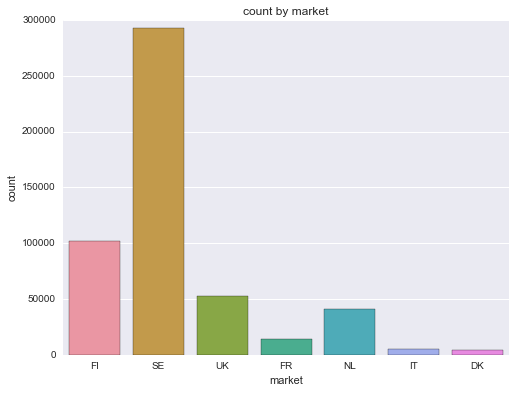

In [31]:
#df2['market']= df2['market'].astype('category')
df4=df3[['market','uid']].reset_index()
seaborn.countplot(x='market', data=df4)
plt.xlabel('market')
plt.title('count by market')

In [38]:
#pd.pivot_table(df3,values='count',index='site_id',columns='week')
df5=df3[['questiontext','optiontext']].drop_duplicates()
df5.pivot('questiontext','optiontext')

questiontext
Have you seen this ad on a mobile device before?
How old are you?
I am
"Is the ad interesting for you?<br><span class=""gray"">1 = Not at all 5 = Very much</span>"
"Next time you are about to use/purchase §category§, how likely are you to choose §brand_name§?<br><br><span class=""gray"">1 = Not at all likely<br>5 = Very likely</span>"


In [39]:
df3.sample(1)

,level_0,index,surveyid,originaladid,surveyadid,format,market,originaladstarttime,originaladendtime,surveyresponcetime,uid,answersetid,answerid,questionid,questiontext,optionid,optiontext,iscomplete,isrefgroup,platformid,devicemodelid,platformtypeid,osid,adspaceid,premlevel,latestimptime,earliestimptime,deliveredimp,imp30pct300ms,click,1stinteraction,imp0pct0ms,viewtime50pct300ms,index,adspaceid,apptype,apptypegroup,channel
56340,56340,56340,386,36562,38144,takeover,SE,2015-12-10 23:00:00,2015-12-14 22:59:00,2015-12-13 16:44:23,6307515828032818508,291936,792514,91,I am,290,Female,t,f,100,103010,1,19000,13441,70,2015-12-13 15:41:30.23,2015-12-12 17:16:29.037,17,17,0,0,17,65976,10118,13441,IPHONE_APP,MOBILE_APP,Gaming/Social Apps


In [53]:
df6= pd.pivot_table(df3, index=['apptypegroup'], values=['viewtime50pct300ms'], 
                    aggfunc=[np.mean, len, sum, np.median, max, min])
df6

,mean,len,sum,median,max,min
,viewtime50pct300ms,viewtime50pct300ms,viewtime50pct300ms,viewtime50pct300ms,viewtime50pct300ms,viewtime50pct300ms
apptypegroup,,,,,,
MOBILE_APP,1117785.798373,83942,9.382918e+10,58363,428033851,0
MOBILE_WEB,256411.352720,428172,1.097882e+11,7010,884186089,0


In [62]:
pd.crosstab(df3.apptypegroup, df3.questiontext)

questiontext,Have you seen this ad on a mobile device before?,How old are you?,I am,"Is the ad interesting for you?<br><span class=""gray"">1 = Not at all 5 = Very much</span>","Next time you are about to use/purchase §category§, how likely are you to choose §brand_name§?<br><br><span class=""gray"">1 = Not at all likely<br>5 = Very likely</span>"
apptypegroup,,,,,
MOBILE_APP,18160,16736,16584,17777,14685
MOBILE_WEB,90672,83975,83709,88523,81293


In [57]:
df3.groupby(level=0).first().shape

(512114, 38)

In [75]:
pd.pivot_table(rawData, index=['questiontext'], columns=['optiontext'], values=['answersetid'],
              aggfunc=[len])

len                \
                                                   answersetid                 
optiontext                                                   1  15-24      2   
questiontext                                                                   
Have you seen this ad on a mobile device before?           NaN    NaN    NaN   
How old are you?                                           NaN  31075    NaN   
I am                                                       NaN    NaN    NaN   
Is the ad interesting for you?<br><span class="...       35887    NaN  22375   
Next time you are about to use/purchase §catego...       30303    NaN  16826   

                                                                         \
                                                                          
optiontext                                          25-34      3  35-44   
questiontext                                                              
Have you seen this ad on a mobile device before?      NaN    NaN    NaN   
How old are you?                                    22614    NaN  18154   
I am                                                  NaN    NaN    NaN   
Is the ad interesting for you?<br><span class="...    NaN  30274    NaN   
Next time you are about to use/purchase §catego...    NaN  26119    NaN   

                                                                               \
                                                                                
optiontext                                              4  45-54      5 55-64   
questiontext                                                                    
Have you seen this ad on a mobile device before?      NaN    NaN    NaN   NaN   
How old are you?                                      NaN  13890    NaN  8414   
I am                                                  NaN    NaN    NaN   NaN   
Is the ad interesting for you?<br><span class="...  11417    NaN   6347   NaN   
Next time you are about to use/purchase §catego...  12057    NaN  10673   NaN   

                                                                               \
                                                                                
optiontext                                           65+ Female   Male     No   
questiontext                                                                    
Have you seen this ad on a mobile device before?     NaN    NaN    NaN  72780   
How old are you?                                    6564    NaN    NaN    NaN   
I am                                                 NaN  66059  34234    NaN   
Is the ad interesting for you?<br><span class="...   NaN    NaN    NaN    NaN   
Next time you are about to use/purchase §catego...   NaN    NaN    NaN    NaN   

                                                           
                                                           
optiontext                                            Yes  
questiontext                                               
Have you seen this ad on a mobile device before?    36052  
How old are you?                                      NaN  
I am                                                  NaN  
Is the ad interesting for you?<br><span class="...    NaN  
Next time you are about to use/purchase §catego...    NaN

In [76]:
pd.pivot(rawData, index=['questiontext'], columns=['optiontext'])

TypeError: pivot_simple() got multiple values for keyword argument 'index'

In [77]:
?np.append

In [83]:
?np.zeros

In [85]:
x=df3.copy()
y=x.pop('uid')

In [125]:
df3.reset_index(drop=True)
# df3 = df3.set_index(['originaladid', 'answersetid'], inplace=True)
# df3 = df3.set_index(['originaladid', 'answersetid','uid'])
df3.head(1)


,index,surveyid,originaladid,surveyadid,format,market,originaladstarttime,originaladendtime,surveyresponcetime,uid,answersetid,answerid,questionid,questiontext,optionid,optiontext,iscomplete,isrefgroup,platformid,devicemodelid,platformtypeid,osid,adspaceid,premlevel,latestimptime,earliestimptime,deliveredimp,imp30pct300ms,click,1stinteraction,imp0pct0ms,viewtime50pct300ms,index,adspaceid,apptype,apptypegroup,channel
0,0,291,36430,36355,swipe,FI,2015-11-01 23:00:00,2015-11-22 22:59:00,2015-11-04 20:31:57,5857845920412998079,218047,595092,86,Is the ad interesting for you?<br><span class=...,263,2,t,f,200,104110,1,25000,8867,100,2015-11-03 13:38:05.139,2015-11-03 13:38:03.618,1,1,0,0,1,2920,5608,8867,MOBILE_WEB,MOBILE_WEB,Family


In [155]:
df_test=df3.groupby('channel').answersetid.nunique().sort_values(ascending=True)
df_channel=pd.DataFrame(df_test).reset_index()
df_channel.columns=['channel','numAnswer']
df_channel

,channel,numAnswer
0,Weather,173
1,Finance/Business,392
2,Portals,575
3,Music/Radio,866
4,Communities,945
5,Technology/Automotive,951
6,Other,1508
7,Family,1800
8,Sports,1989
9,Gaming/Social Apps,2011


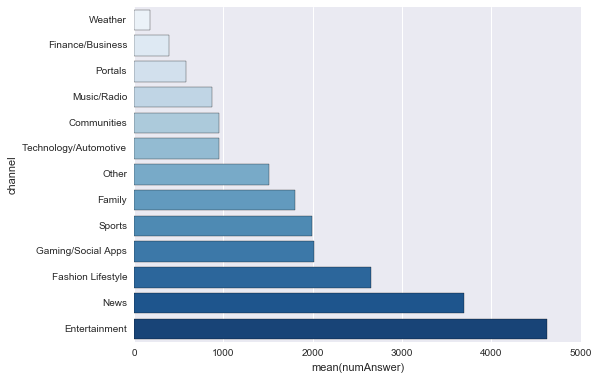

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='numAnswer',y='channel', data=df_channel, label='Channel', palette='Blues')